1.	Data Acquistion - OK
2.	Exploratory data analysis Analysis 
2.1.	Statistical data analysis - OK
2.2.	Investigating Outliers - OK
2.3.	Investigating Missing Values - OK
3.	Data Preprocessing
3.1.	Timeseries Missing Value Treatment - No missing values
3.2.	Timeseries Outliers handling - Couldn't make it
3.3.	Convert timestemps and dataset index - OK
4.	Most correlated columns Variables Selection - OK
5.	Data Transformation... - Not sure about this

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from histograms import histograms


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn import datasets
from sklearn.datasets import make_classification

C:\ProgramData\Anaconda3\lib\site-packages\histograms\utils.py:6: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import MultiIndex


In [3]:
ff_dataset = pd.read_csv("Microsoft_2015-2021.csv");
ff_dataset.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
ff_dataset.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [5]:
ff_dataset.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [45]:
ff_dataset['Volume'] = ff_dataset['Volume'].astype(float)

In [46]:
ff_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   int64  
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 71.0 KB


In [47]:
ff_dataset.shape

(1511, 6)

In [48]:
ff_dataset.nunique()
ff_dataset['Date'].unique()

array([   0,    1,    2, ..., 1508, 1509, 1510], dtype=int64)

Identifying NULL Values

In [49]:
ff_dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Duplicate Values


In [50]:
duplicate = ff_dataset.duplicated()
print("Total duplicated: ", duplicate.sum())
ff_dataset[duplicate]

Total duplicated:  0


,Date,Open,High,Low,Close,Volume


Correlation

In [51]:
correlation = ff_dataset.corr()

Text(0.5, 1.0, 'Seaborn heatmap - Correlation between all Variables')

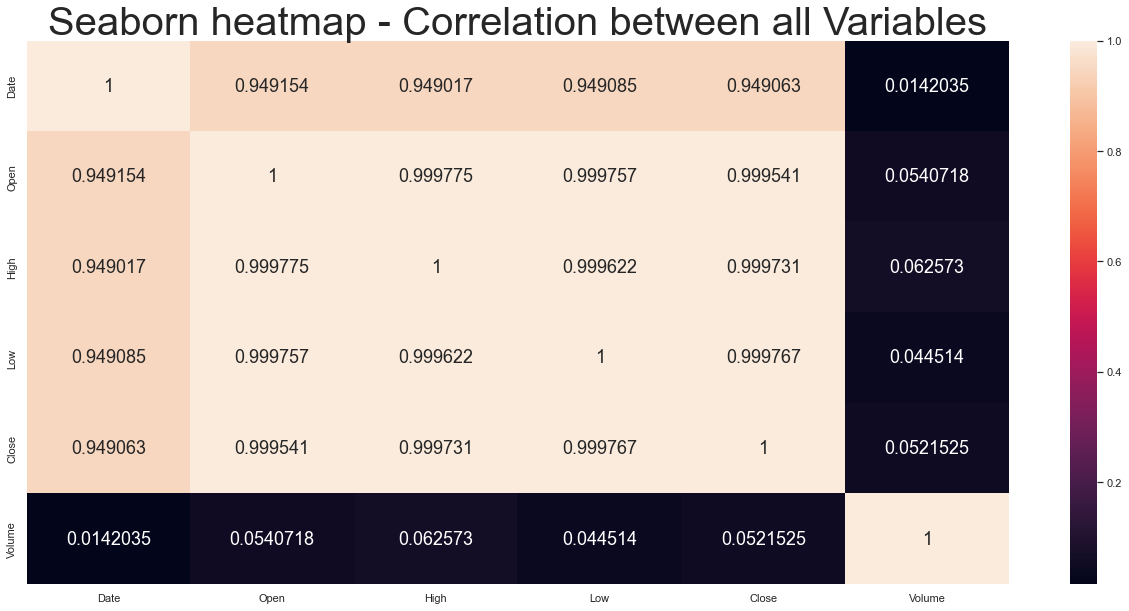

In [52]:
plt.figure(figsize=(22,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,annot_kws={"size": 18}, fmt='g')
plt.title('Seaborn heatmap - Correlation between all Variables', fontsize = 40)


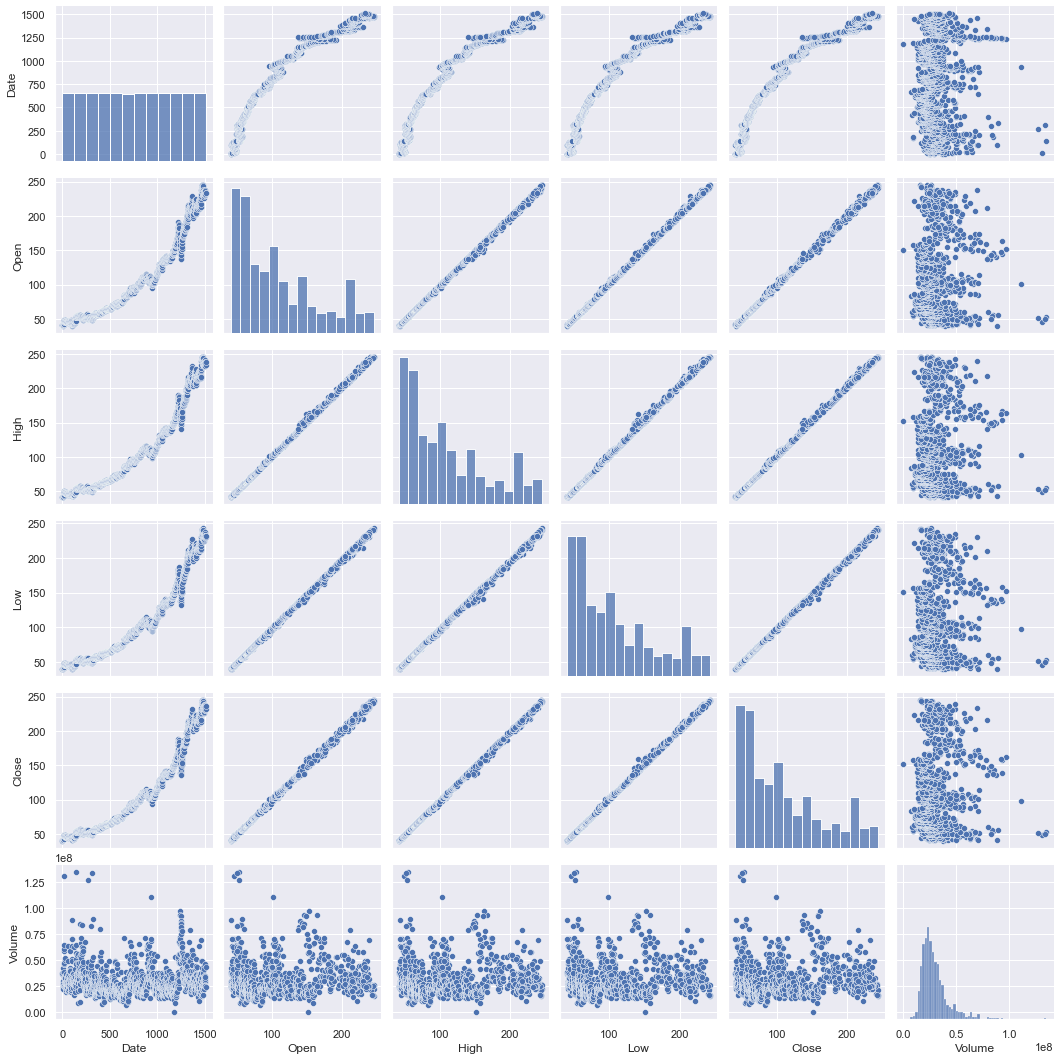

In [53]:
#Pair Grid
sns.pairplot(ff_dataset)

Some Graphs - using Full data set (ff_dataset)


In [54]:
columnnames =['Open', 'High', 'Low', 'Close']
#columnnames =list(ff_dataset.columns)

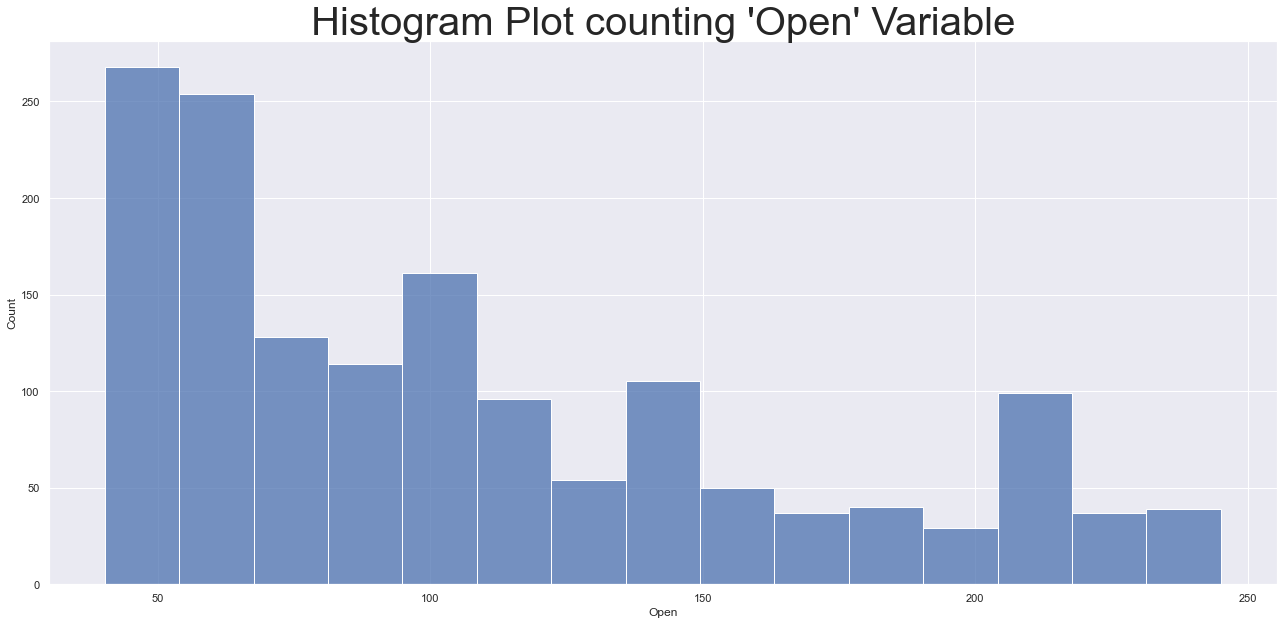

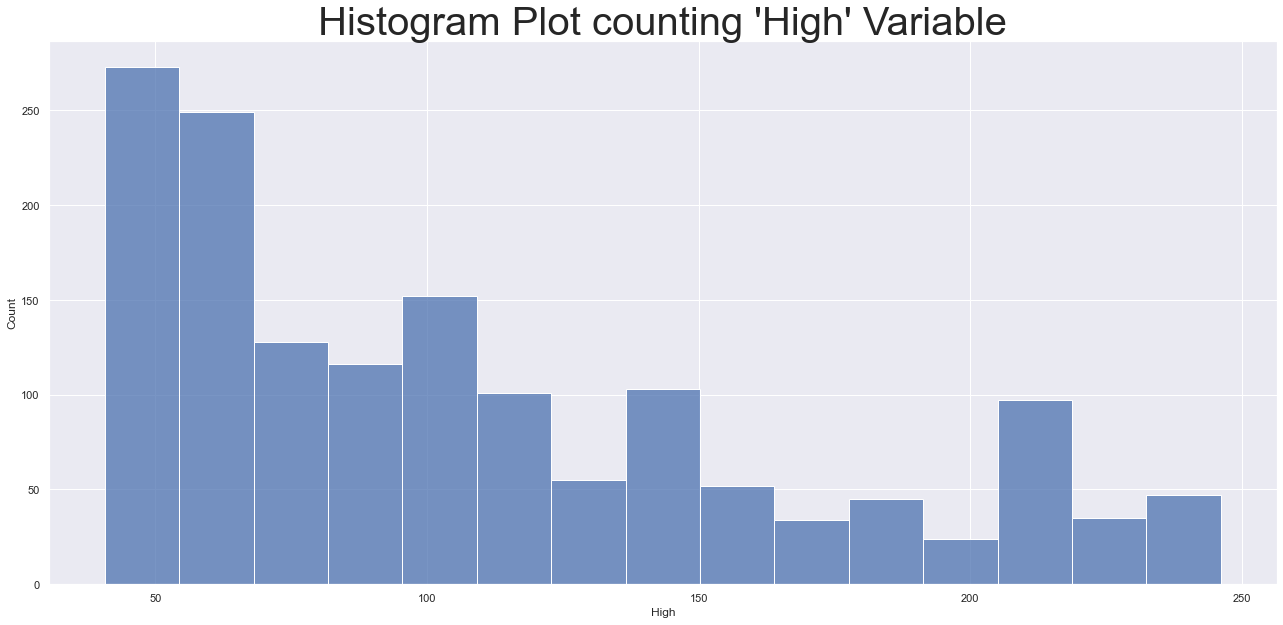

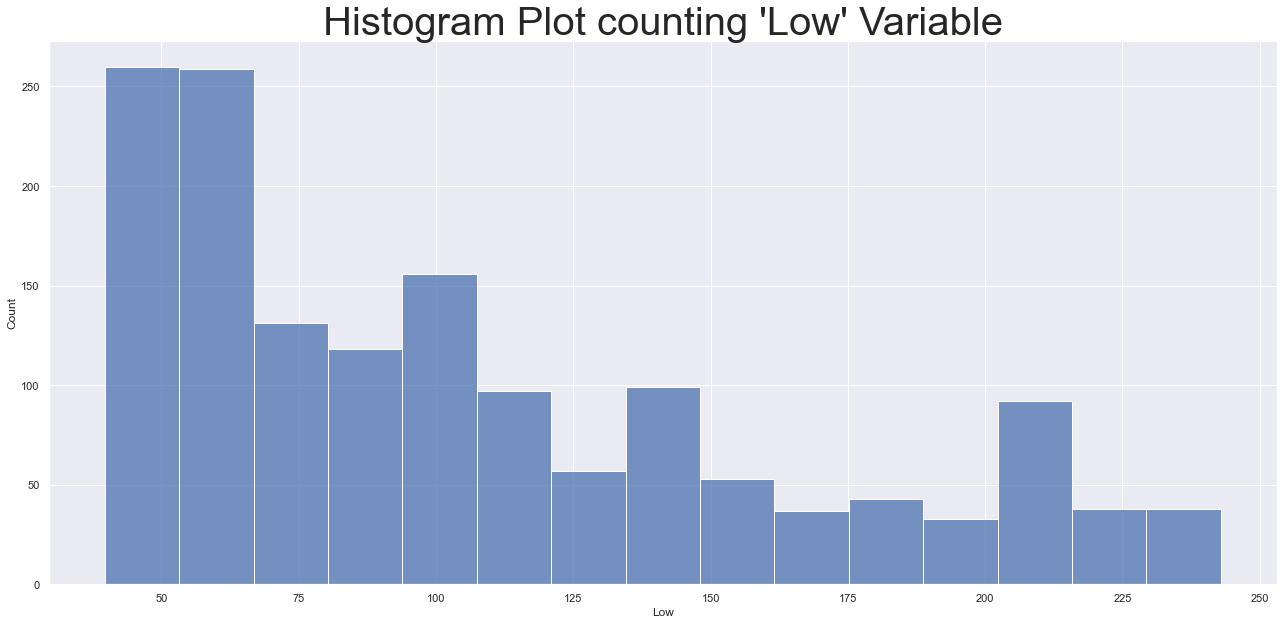

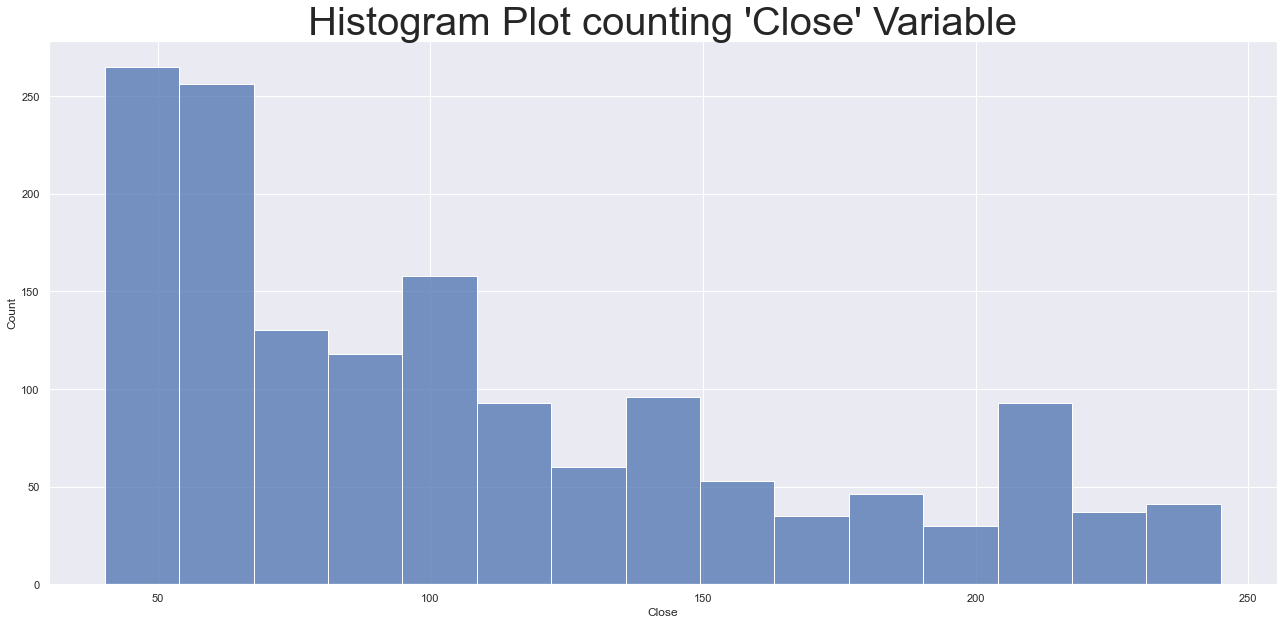

In [55]:
for columnname in columnnames:
    plt.figure(figsize=(22,10))
    sns.histplot(ff_dataset[columnname])
    plt.title("Histogram Plot counting '"+ columnname+ "' Variable", fontsize = 40)
    plt.show()

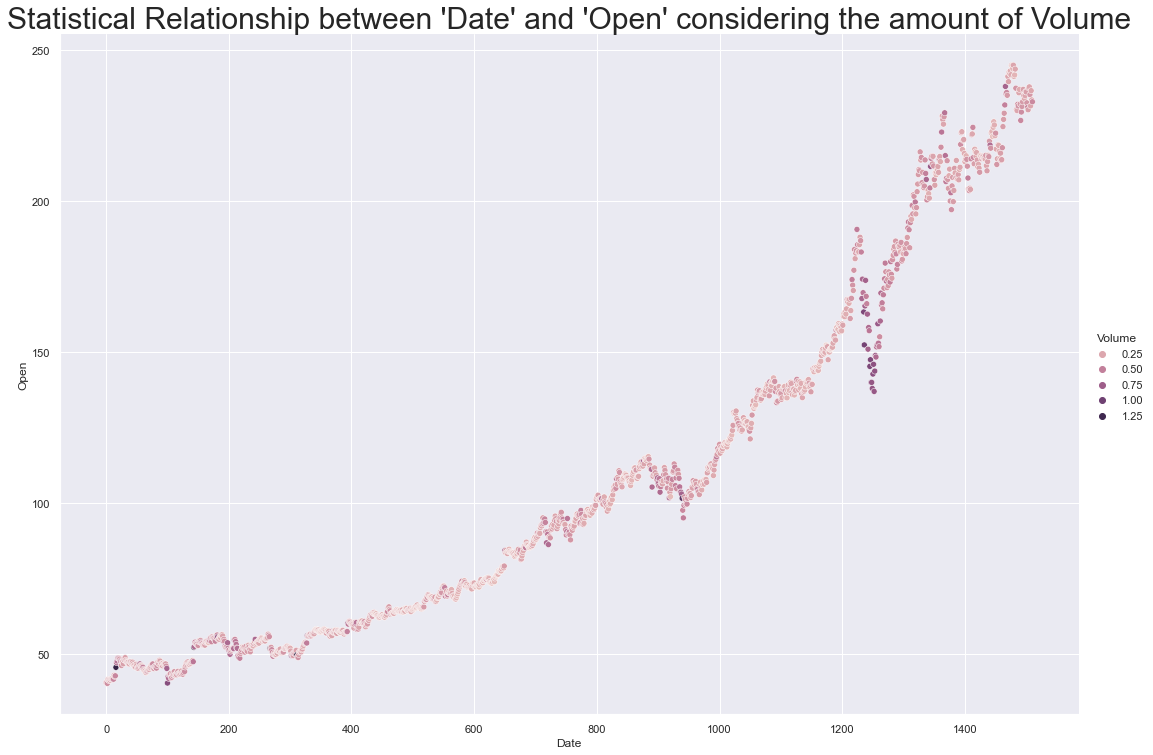

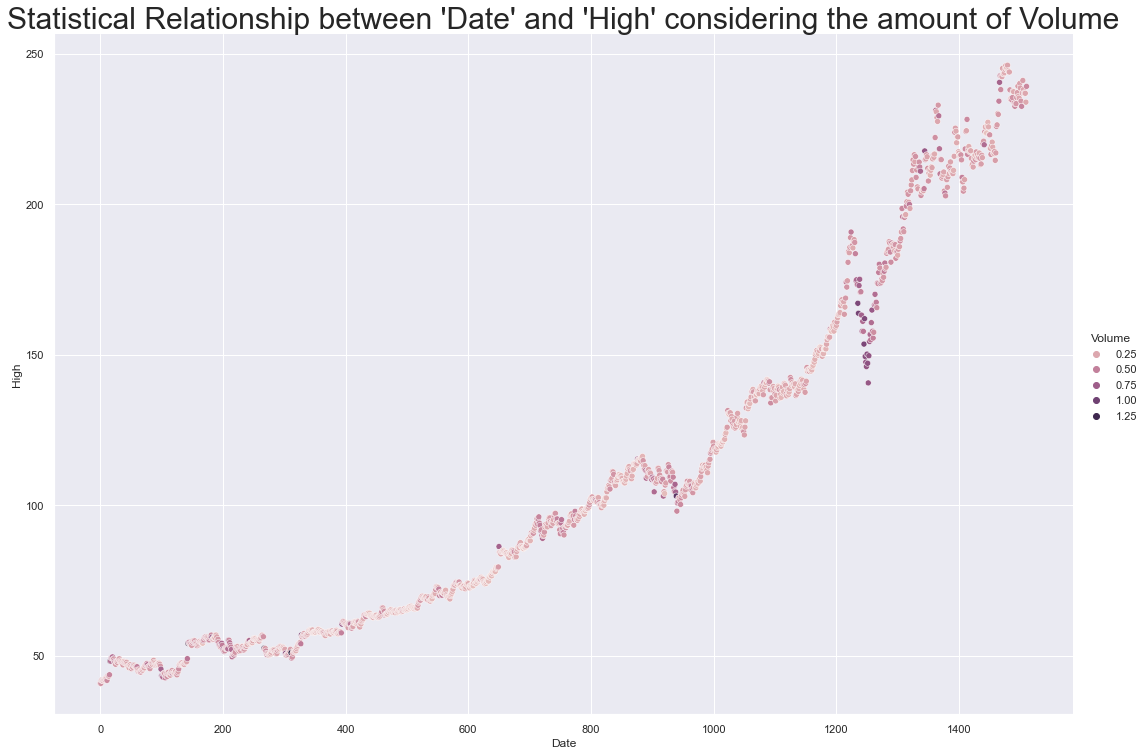

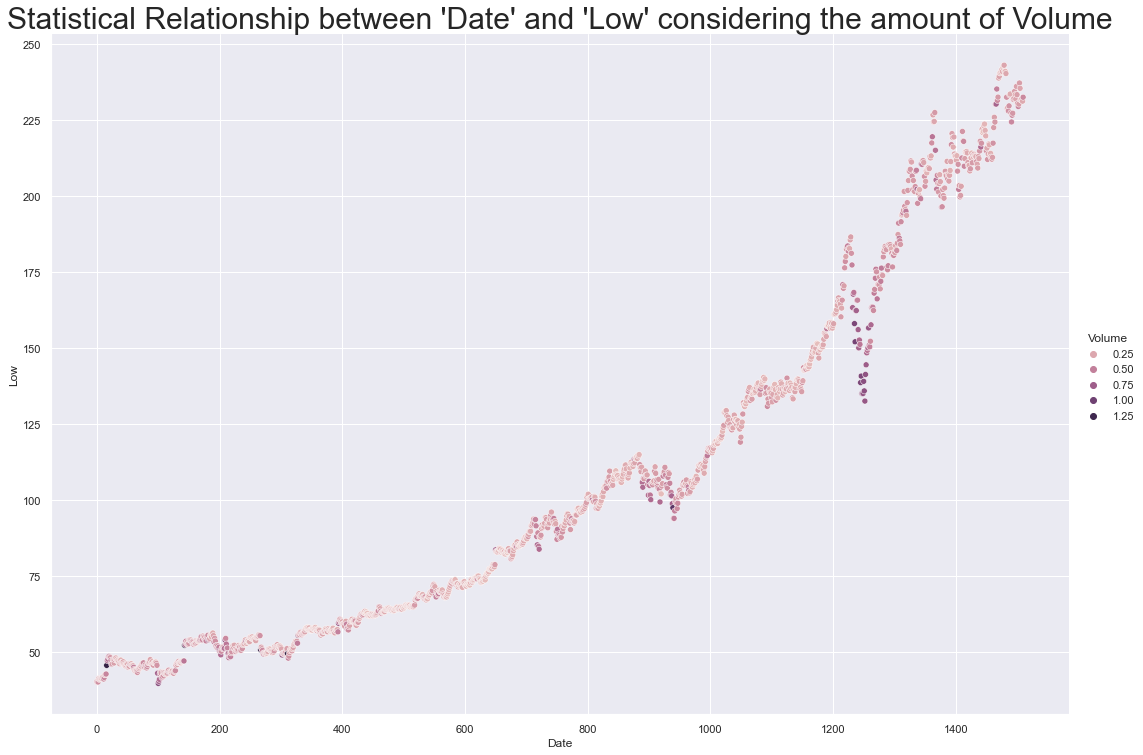

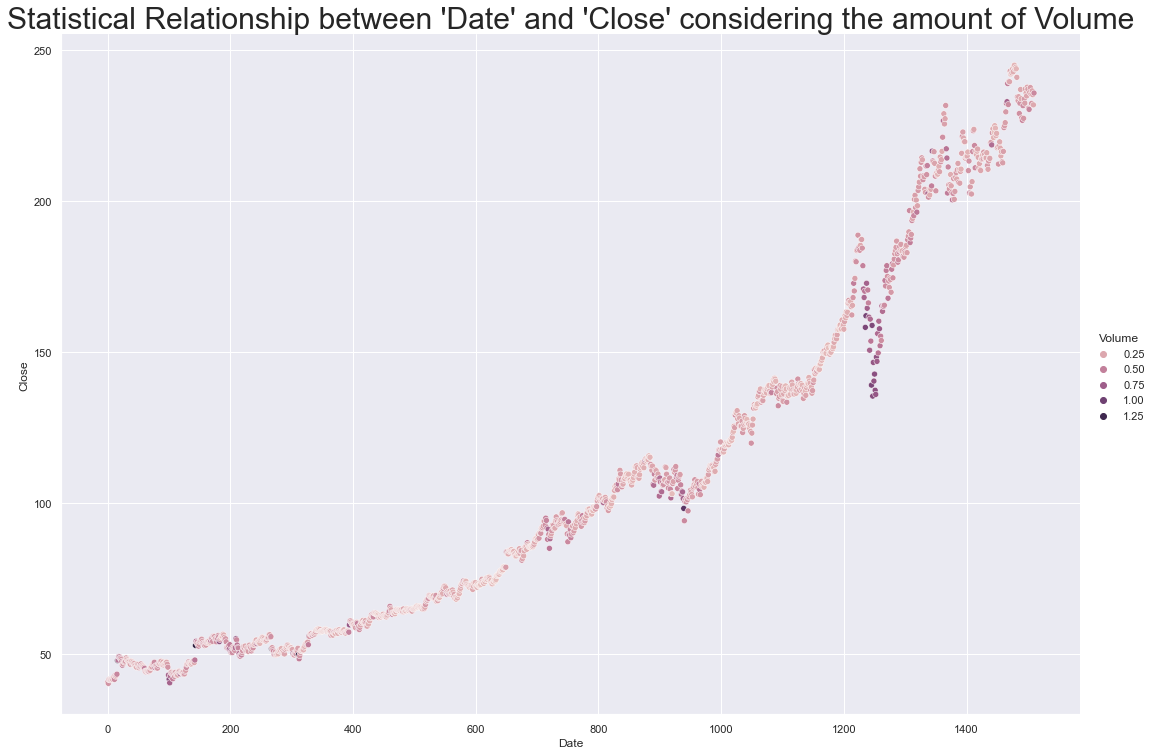

In [56]:
#plt.figure(figsize=(220,100))
for columnname in columnnames:
    sns.relplot(x='Date', y=columnname, hue='Volume', data=ff_dataset, height=10.27, aspect=10.7/7.27)
    plt.title("Statistical Relationship between 'Date' and '"+columnname+"' considering the amount of Volume", fontsize = 30)




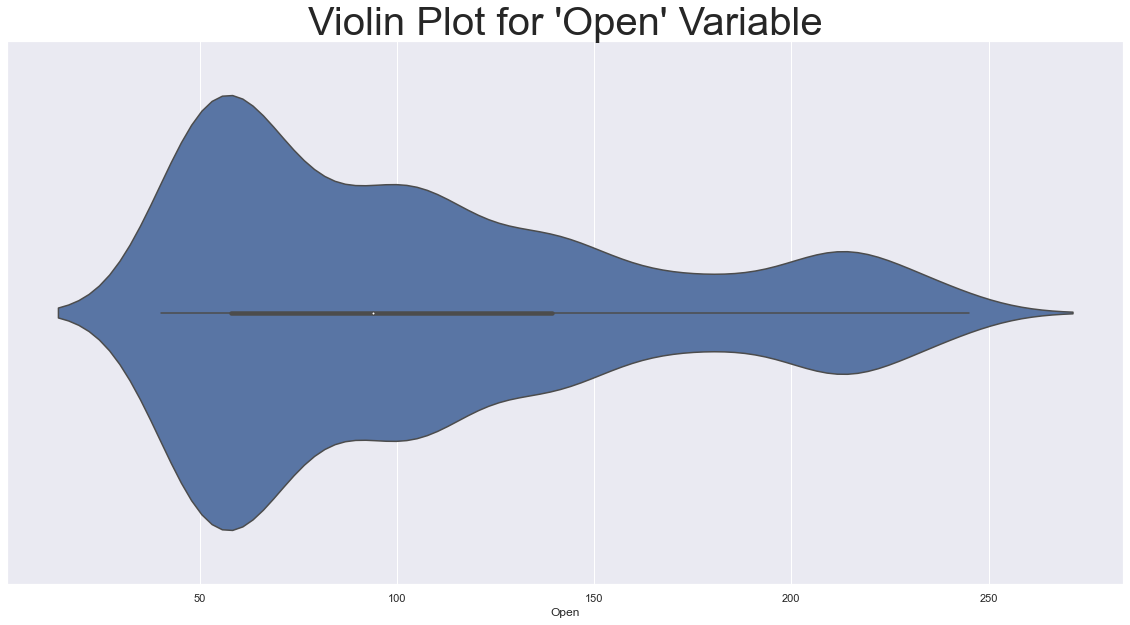

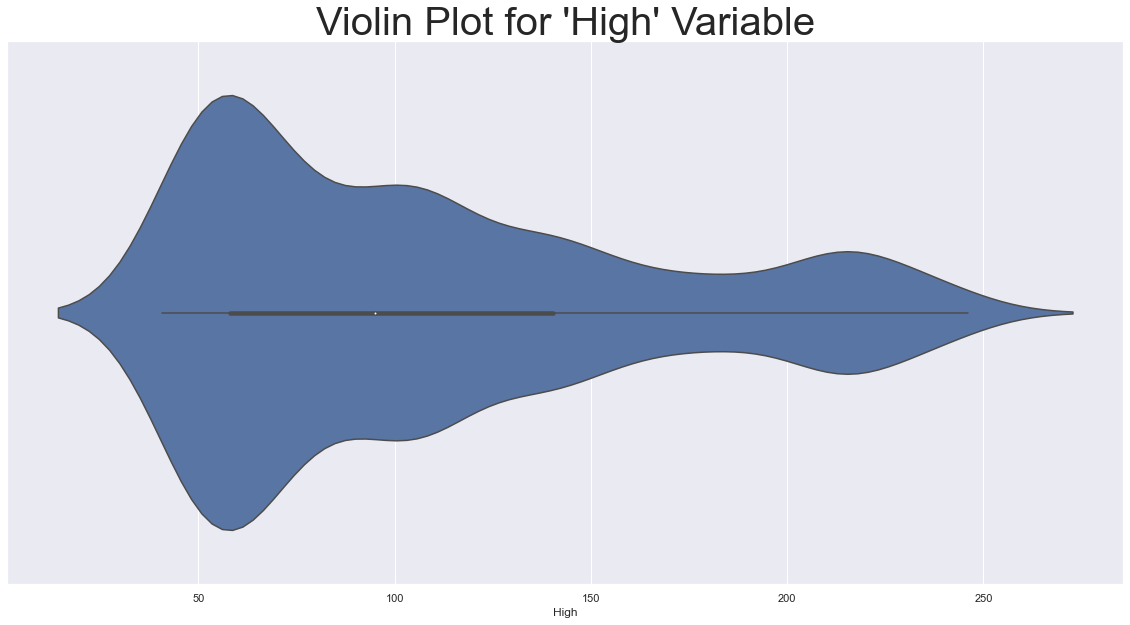

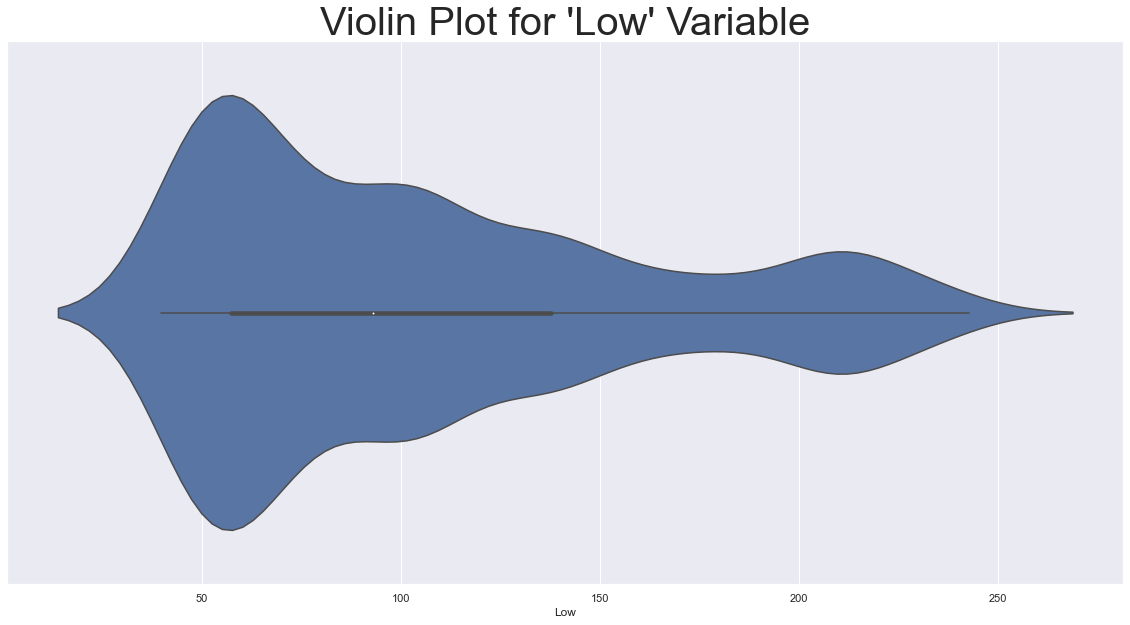

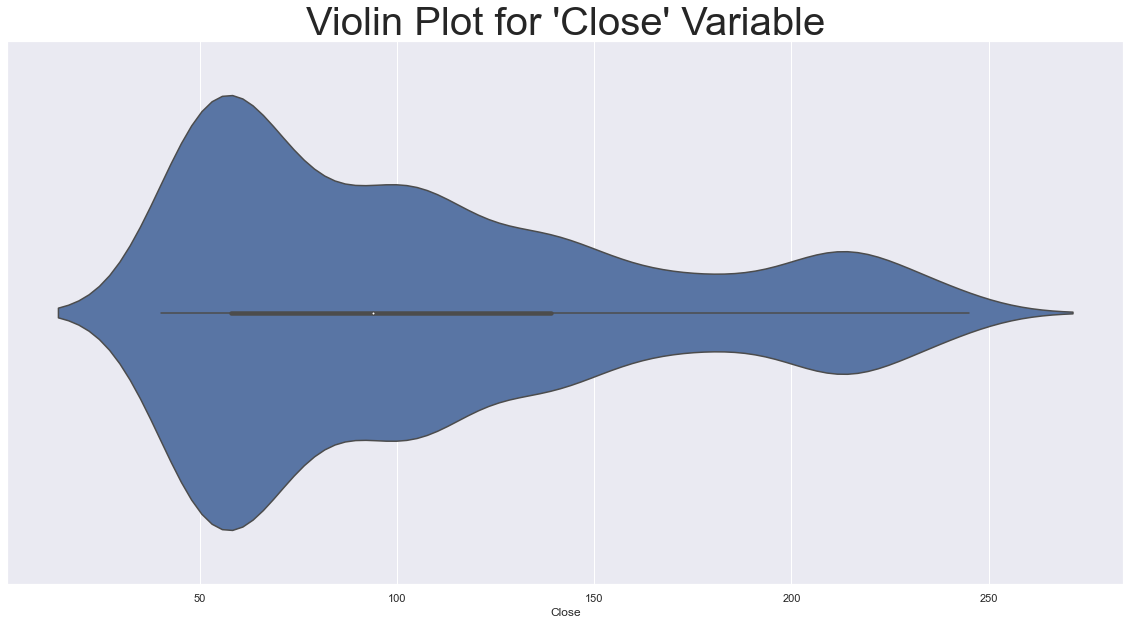

In [57]:
for columnname in columnnames:
  plt.figure(figsize=(20,10))
  sns.violinplot(x = columnname, data = ff_dataset)
  plt.title("Violin Plot for '"+ columnname+ "' Variable", fontsize = 40)
  plt.show()

In [58]:
volume = pd.DataFrame(ff_dataset.groupby("Volume").nunique().sort_values("Date", ascending=False).head())
#top_10

import plotly.express as px
segments = volume
fig = px.pie(segments, 
             values = volume["Volume"],
            names = volume.index,
            title = "Highest volume by Date",
            template = "seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

In [59]:
#Convert timestemps and dataset index
ff_dataset['Date'] = ff_dataset.index
ff_dataset.head()

,Date,Open,High,Low,Close,Volume
0,0,40.60,40.76,40.31,40.72,36865322.0
1,1,40.66,40.74,40.12,40.29,37487476.0
2,2,40.34,41.78,40.18,41.55,39223692.0
3,3,41.61,41.91,41.31,41.53,28809375.0
4,4,41.48,41.69,41.04,41.42,24753438.0


Identifying and removing outliers from dataset

In [60]:
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

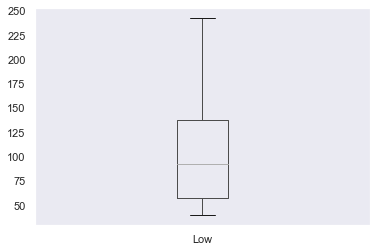

In [61]:
plot_boxplot(ff_dataset, "Low")

In [62]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
  return ls

In [63]:
index_list = []
for feature in ["Open", "High", "Low", "Close","Volume"]:
  index_list.extend(outliers(ff_dataset, feature))

In [64]:
def remove(df, ls):
  ls=sorted(set(ls))
  df=df.drop(ls)
  return df

In [65]:
df_cleaned = remove(ff_dataset, index_list)
df_cleaned.head()

,Date,Open,High,Low,Close,Volume
0,0,40.60,40.76,40.31,40.72,36865322.0
1,1,40.66,40.74,40.12,40.29,37487476.0
2,2,40.34,41.78,40.18,41.55,39223692.0
3,3,41.61,41.91,41.31,41.53,28809375.0
4,4,41.48,41.69,41.04,41.42,24753438.0


In [66]:
#dropping data column to not being incompatible with some processes
df_cleaned.drop('Date', axis=1, inplace=True)

In [67]:
df_cleaned.shape

(1411, 5)

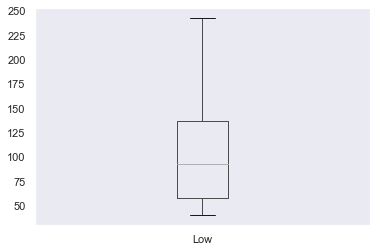

In [68]:
plot_boxplot(df_cleaned, 'Low')

In [69]:
df_cleaned.describe()

,Open,High,Low,Close,Volume
count,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03
mean,107.181375,108.133692,106.216371,107.249936,2.743343e+07
std,56.807963,57.448789,56.169758,56.840708,8.814833e+06
min,40.340000,40.740000,40.120000,40.290000,7.425603e+06
25%,57.995000,58.250000,57.750000,58.030000,2.096549e+07
50%,93.300000,94.160000,92.430000,93.320000,2.593446e+07
75%,138.520000,139.220000,136.920000,138.120000,3.276586e+07
max,245.030000,246.130000,242.920000,244.990000,5.359961e+07


Text(0.5, 1.0, 'Scatterplot comparing incidences of High against Low from dataset without outliers')

<Figure size 576x288 with 0 Axes>

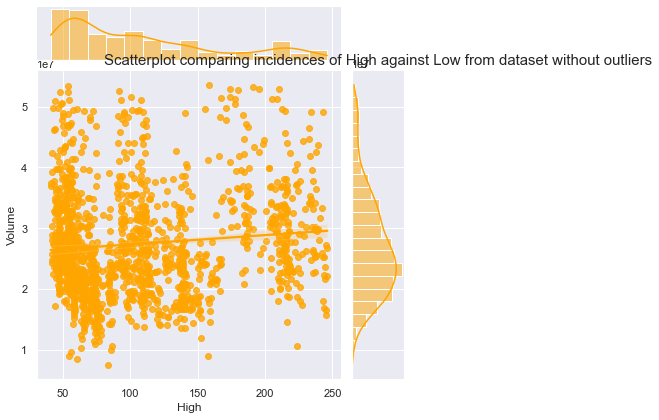

In [70]:
#Scatterplot comparing incidences of High against Low from dataset without outliers
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot (x='High', y='Volume', data=df_cleaned, kind='reg', color='orange')
plt.title('Scatterplot comparing incidences of High against Low from dataset without outliers', fontsize = 15)

Text(0.5, 1.0, 'Pair Grid for dataset (without outliers)')

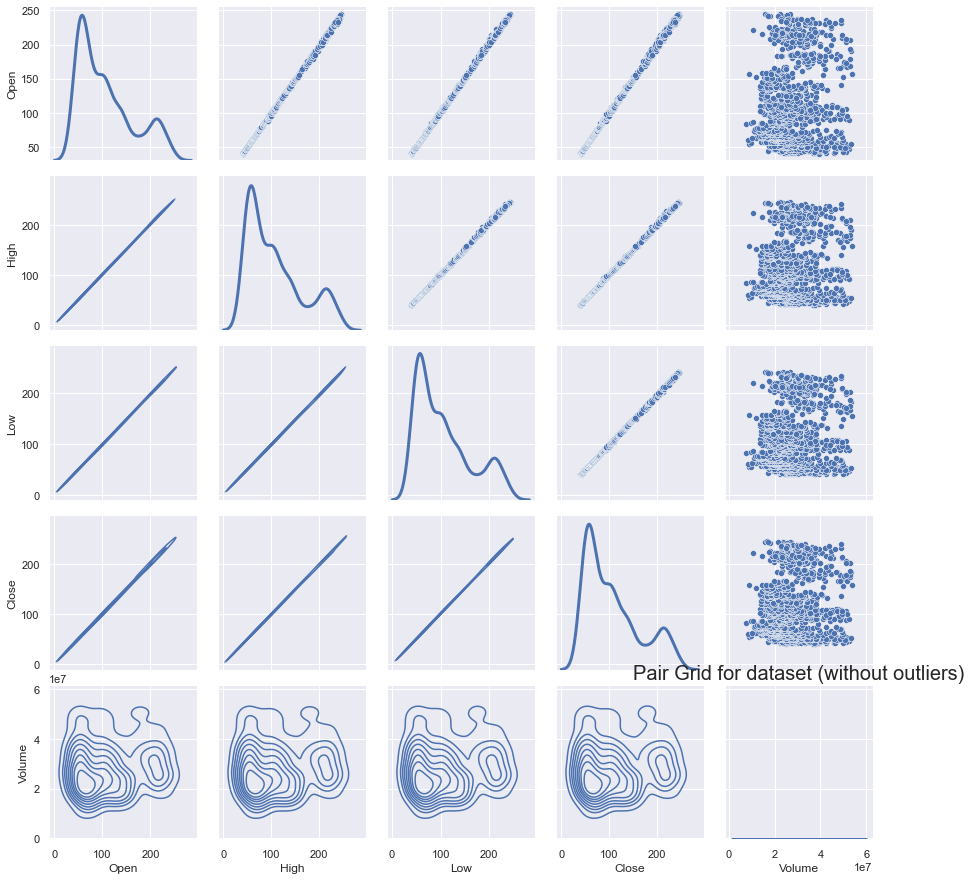

In [71]:
g = sns.PairGrid(df_cleaned)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.title("Pair Grid for dataset (without outliers)", fontsize = 20)

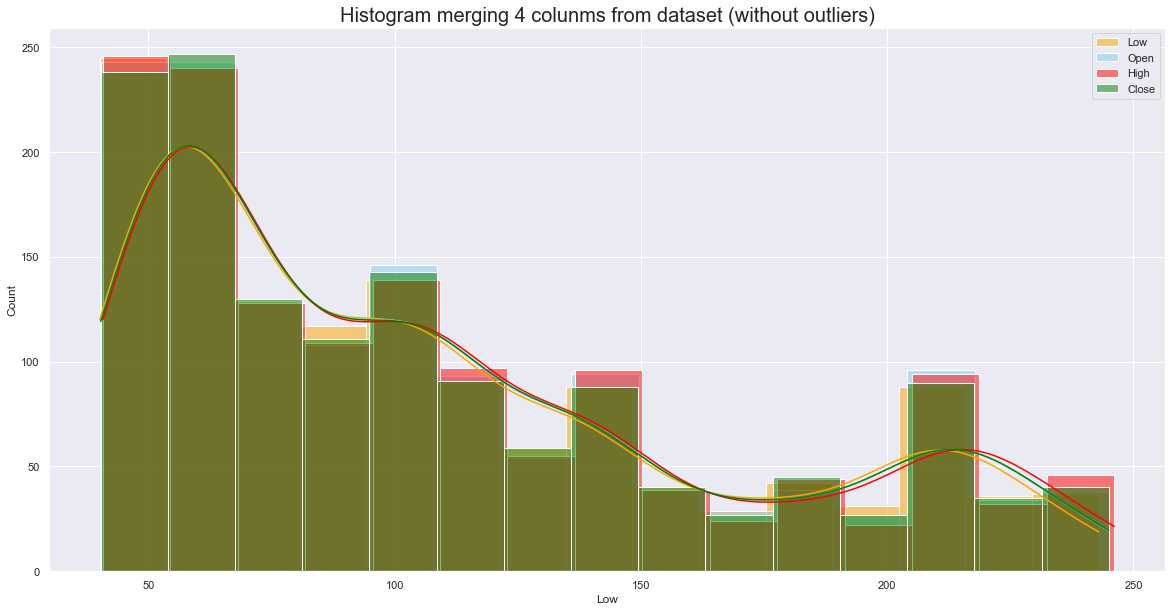

In [72]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.histplot(data=df_cleaned, x="Low", color="orange", label="Low", kde=True)
sns.histplot(data=df_cleaned, x="Open", color="skyblue", label="Open", kde=True)
sns.histplot(data=df_cleaned, x="High", color="red", label="High", kde=True)
sns.histplot(data=df_cleaned, x="Close", color="green", label="Close", kde=True)
plt.title("Histogram merging 4 colunms from dataset (without outliers)", fontsize = 20)
plt.legend() 
plt.show()

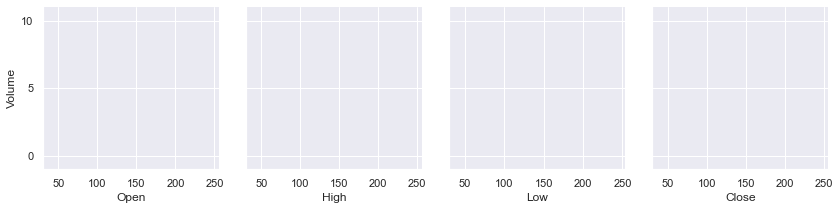

In [73]:
g = sns.PairGrid(df_cleaned, y_vars=["Volume"], x_vars=["Open", "High", "Low", "Close"], height=3)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

In [74]:
df_cleaned.head

<bound method NDFrame.head of         Open    High     Low   Close      Volume
0      40.60   40.76   40.31   40.72  36865322.0
1      40.66   40.74   40.12   40.29  37487476.0
2      40.34   41.78   40.18   41.55  39223692.0
3      41.61   41.91   41.31   41.53  28809375.0
4      41.48   41.69   41.04   41.42  24753438.0
...      ...     ...     ...     ...         ...
1506  235.30  236.94  231.57  232.34  34061853.0
1507  231.55  236.71  231.55  236.48  25479853.0
1508  236.59  236.80  231.88  235.24  25227455.0
1509  233.53  233.85  231.10  231.85  24792012.0
1510  232.91  239.10  232.39  235.77  43623471.0

[1411 rows x 5 columns]>

Finished outliers process

Data Normalization


In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

Norm = scaler.fit_transform(df_cleaned)

print(Norm)

sns.displot(Norm, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

[[1.10130599e-06 1.10564611e-06 1.09343952e-06 1.10456108e-06
  1.00000000e+00]
 [1.08462890e-06 1.08676295e-06 1.07022409e-06 1.07475894e-06
  1.00000000e+00]
 [1.02846004e-06 1.06517255e-06 1.02438088e-06 1.05930875e-06
  1.00000000e+00]
 ...
 [9.37827458e-06 9.38659884e-06 9.19157323e-06 9.32476145e-06
  1.00000000e+00]
 [9.41956627e-06 9.43247365e-06 9.32155083e-06 9.35180251e-06
  1.00000000e+00]
 [5.33909830e-06 5.48099439e-06 5.32717811e-06 5.40465934e-06
  1.00000000e+00]]


Min Max Scaler

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MMscaled = scaler.fit_transform(df_cleaned)
print(MMscaled)
sns.displot(MMscaled, kde=True, height=10.27, aspect=10.7/7.27)
plt.title("Min Max Scaler for dataset (without outliers)", fontsize = 30)

Data standardization

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
Sscaled = scaler.fit_transform(df_cleaned)
print(Sscaled)
sns.displot(Sscaled, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Data standardization for dataset (without outliers)", fontsize = 30)


Robust Scaler

In [ ]:
# Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df_cleaned)
Rscaler = scaler.transform(df_cleaned)
print(Rscaler)
sns.displot(Rscaler, kind="kde", multiple="stack", height=10.27, aspect=10.7/7.27)
plt.title("Robust Scaler for dataset (without outliers)", fontsize = 30)

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.regplot(x="Adj Close", y="Volume", data=df_cleaned)
plt.title("Data Normalization for dataset (without outliers)", fontsize = 30)

Function for Model Evaluation


In [108]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(6,6)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')

Pre Processing, defining Train and Test
Also checking dimension

In [40]:
X = ff_dataset.drop('Open', axis = 1)
y = ff_dataset['Open']
X.shape

(3315, 6)

In [41]:
y.shape

(3315,)

In [42]:
#Train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
X_train.shape


(2652, 6)

In [44]:
y_train.shape

(2652,)

In [45]:
X_test.shape

(663, 6)

In [46]:
y_test.shape

(663,)

References

https://www.stackvidhya.com/how-to-add-header-to-pandas-dataframe/;
https://www.addoptics.nl/optics-explained/refractive-index/
https://analyticsindiamag.com/exploring-dataprep-a-python-library-for-data-preparation-eda/#:~:text=DataPrep%20is%20an%20open%2Dsource,solved%20and%20taken%20care%20of.
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
https://dzone.com/articles/python-class-attributes-vs-instance-attributes#:~:text=A%20class%20attribute%20is%20a,.)%20%2C%20of%20the%20class.
https://machinelearningmastery.com/difference-test-validation-datasets/
https://stringfixer.com/pt/Training_data
https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://baipureddyneeraj.medium.com/glass-classification-using-various-machine-learning-techniques-cf268fd520d6
https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html
https://community.developers.refinitiv.com/questions/71300/python-time-series-convert-date-index-to-pandas-co.html
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
https://moonbooks.org/Articles/How-to-increase-the-size-of-the-cells-text-annotations-of-a-seaborn-heatmap-in-python-/
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://deepnote.com/@econdesousa/ViolinPlotvsBoxPlot-aadf0c53-53b4-4221-89b9-4388c54c68bd
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/
https://seaborn.pydata.org/tutorial/distributions.html
https://seaborn.pydata.org/tutorial/relational.html